################### Decision Tree ####################
Accuracy: 0.9088050314465409
Confusion Matrix:
[[ 72   6   0]
 [  1 104  11]
 [  4   7 113]]


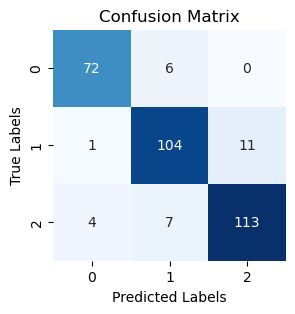

     Class  Precision    Recall  F1 Score
0  Class 1   0.935065  0.923077  0.929032
1  Class 2   0.888889  0.896552  0.892704
2  Class 3   0.911290  0.911290  0.911290
################### SVM Algorithm ####################
Accuracy: 0.6981132075471698
Confusion Matrix:
[[47 30  1]
 [24 78 14]
 [13 14 97]]


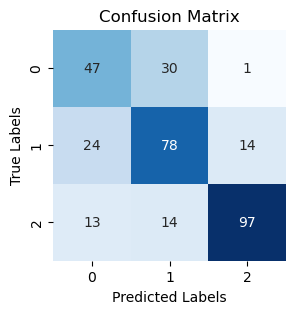

     Class  Precision    Recall  F1 Score
0  Class 1   0.559524  0.602564  0.580247
1  Class 2   0.639344  0.672414  0.655462
2  Class 3   0.866071  0.782258  0.822034
################### Random Forest Algorithm ####################
0.7610062893081762
Confusion Matrix:
[[ 26  35  17]
 [  0 100  16]
 [  0   8 116]]


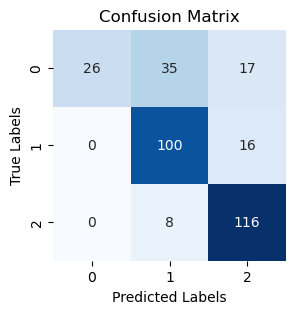

     Class  Precision    Recall  F1 Score
0  Class 1   1.000000  0.333333  0.500000
1  Class 2   0.699301  0.862069  0.772201
2  Class 3   0.778523  0.935484  0.849817
################### Logistic Regression Algorithm ####################
0.60062893081761
Confusion Matrix:
[[34 29 15]
 [21 67 28]
 [ 9 25 90]]


C:\Users\veena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


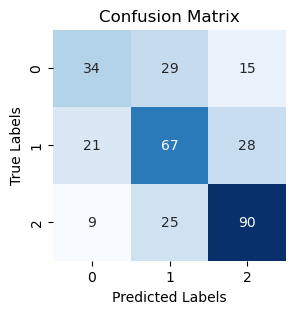

     Class  Precision    Recall  F1 Score
0  Class 1   0.531250  0.435897  0.478873
1  Class 2   0.553719  0.577586  0.565401
2  Class 3   0.676692  0.725806  0.700389
################### NAIVE BAYES Algorithm ####################
Accuracy: 0.559748427672956
Confusion Matrix:
[[74  4  0]
 [63 26 27]
 [22 24 78]]


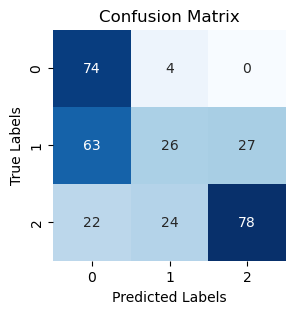

     Class  Precision    Recall  F1 Score
0  Class 1   0.465409  0.948718  0.624473
1  Class 2   0.481481  0.224138  0.305882
2  Class 3   0.742857  0.629032  0.681223


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'c:\python\milknew.csv')
#print(data.head())
#print(data)
# print(data.shape)
#data.info()
#print(data.describe().T)
data['Grade'].unique()
data.isnull().sum()
# plt.figure(figsize=(7, 3))
# data.boxplot()

#Skewness Reduction

quantile1=data["Temprature"].quantile(0.25)
quantile2=data["Temprature"].quantile(0.75)

data["Temprature"]=np.where(data["Temprature"]<quantile1,quantile1,data["Temprature"])
data["Temprature"]=np.where(data["Temprature"]>quantile2,quantile2,data["Temprature"])
t = round(data['Temprature'].skew(),10)
#print(t)

quantile1=data["Colour"].quantile(0.25)
quantile2=data["Colour"].quantile(0.75)

data["Colour"]=np.where(data["Colour"]<quantile1,quantile1,data["Colour"])
data["Colour"]=np.where(data["Colour"]>quantile2,quantile2,data["Colour"])
c = round(data['Colour'].skew(),10)
#print(c)

quantile1=data["pH"].quantile(0.25)
quantile2=data["pH"].quantile(0.75)

data["pH"]=np.where(data["pH"]<quantile1,quantile1,data["pH"])
data["pH"]=np.where(data["pH"]>quantile2,quantile2,data["pH"])
ph = round(data['pH'].skew(),10)
#print(ph)

# plt.figure(figsize=(7, 3))
# data.boxplot()

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()
from sklearn.model_selection import train_test_split
X=data.drop(['Grade'],axis=1)
y=data['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=143)


def calculate_metrics(confusion_matrix):
    # Initialize lists to store precision, recall, and F1 score for each class
    precision = []
    recall = []
    f1_score = []
    
    # Calculate metrics for each class
    num_classes = confusion_matrix.shape[0]
    for i in range(num_classes):
        # True Positives (TP) for the class
        TP = confusion_matrix[i, i]
        
        # False Positives (FP) for the class
        FP = np.sum(confusion_matrix[:, i]) - TP
        
        # False Negatives (FN) for the class
        FN = np.sum(confusion_matrix[i, :]) - TP
        
        # True Negatives (TN) for the class
        TN = np.sum(confusion_matrix) - (TP + FP + FN)
        
        # Precision, Recall, and F1 Score for the class
        class_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        class_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall) if (class_precision + class_recall) > 0 else 0
        
        # Append results to lists
        precision.append(class_precision)
        recall.append(class_recall)
        f1_score.append(class_f1)
    
   # Create a DataFrame for displaying in table format
    metrics_df = pd.DataFrame({
        "Class": [f"Class {i+1}" for i in range(num_classes)],
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score
    })
    
    return metrics_df


# decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred.shape

print('################### Decision Tree ####################')

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
score=accuracy_score(y_pred,y_test)
print(f'Accuracy: {score}')

#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Call the function and print the results
metrics = calculate_metrics(conf_matrix)
print(metrics)


# SVM Algorithm

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
print('################### SVM Algorithm ####################')
print(f'Accuracy: {score}')


# Generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Call the function and print the results
metrics = calculate_metrics(conf_matrix)
print(metrics)


# Random Forest algorithm

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
print('################### Random Forest Algorithm ####################')
print(accuracy_score(y_test,prediction))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test,prediction)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Call the function and print the results
metrics = calculate_metrics(conf_matrix)
print(metrics)


# LOGISTIC REGRESSION algoritm
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=1.0,random_state=2)
regressor.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
print('################### Logistic Regression Algorithm ####################')
print(accuracy_score(y_test,prediction))
# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test,prediction)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Call the function and print the results
metrics = calculate_metrics(conf_matrix)
print(metrics)


# NAIVE BAYES algorithm

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred.shape

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('################### NAIVE BAYES Algorithm ####################')
print(f'Accuracy: {score}')

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Call the function and print the results
metrics = calculate_metrics(conf_matrix)
print(metrics)
